In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv("./churn.csv");

In [44]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


<Axes: xlabel='target', ylabel='count'>

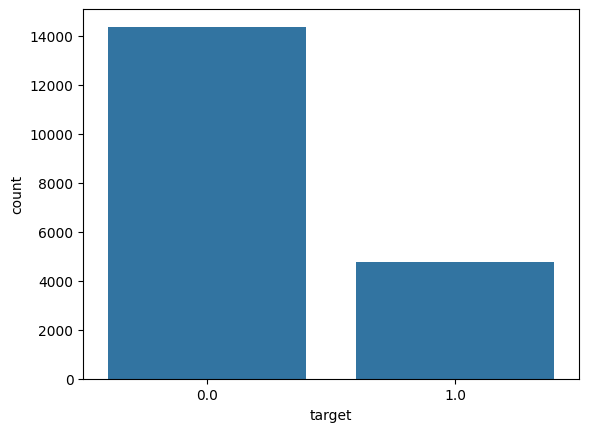

In [45]:
sns.countplot(x='target', data=df)

In [46]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [47]:
df['enrolled_university'].value_counts()

enrolled_university
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: count, dtype: int64

In [48]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [49]:
df.size

268212

In [50]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [51]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [52]:
df['enrolled_university'].value_counts()

enrolled_university
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: count, dtype: int64

In [53]:
df.columns.groupby(df.dtypes)

{int64: ['enrollee_id', 'training_hours'], float64: ['city_development_index', 'target'], object: ['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']}

In [54]:
df['relevent_experience'].value_counts()

relevent_experience
Has relevent experience    13792
No relevent experience      5366
Name: count, dtype: int64

In [55]:
df['enrolled_university'].value_counts()

enrolled_university
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: count, dtype: int64

In [56]:
df['city'].value_counts()  # irrelevant, city_development_index is better to consider

city
city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_129       3
city_111       3
city_121       3
city_140       1
city_171       1
Name: count, Length: 123, dtype: int64

In [57]:
df['education_level'].value_counts()

education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64

In [58]:
df['major_discipline'].value_counts()

major_discipline
STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: count, dtype: int64

In [59]:
df['experience'].value_counts()

experience
>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: count, dtype: int64

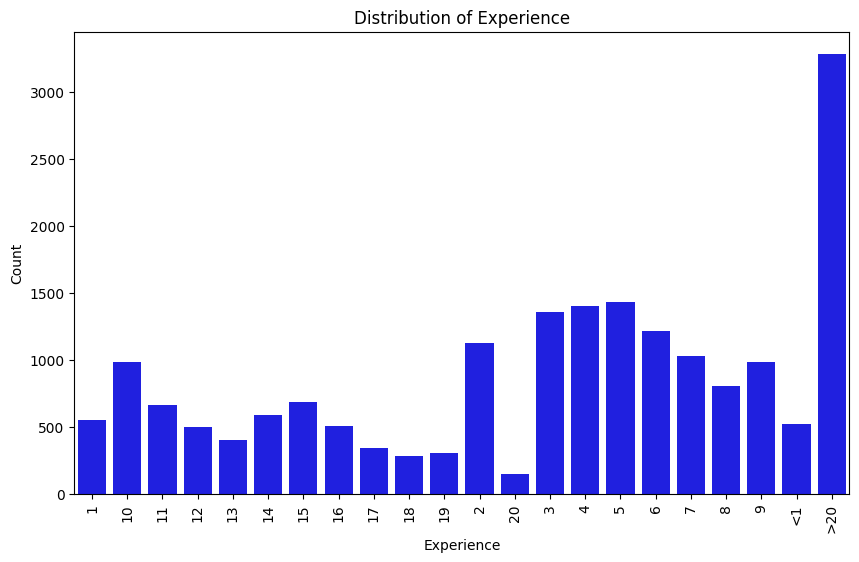

In [60]:
experience_counts = df['experience'].value_counts()

experience_counts = experience_counts.sort_index()

plt.figure(figsize=(10,6))
sns.barplot(x=experience_counts.index, y=experience_counts.values, color='b')
plt.xlabel('Experience')
plt.ylabel('Count')
plt.title('Distribution of Experience')
plt.xticks(rotation=90)
plt.show()

In [61]:
df['last_new_job'].value_counts()

last_new_job
1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: count, dtype: int64

In [62]:
df['company_size'].value_counts()

company_size
50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: count, dtype: int64

In [63]:
df['company_type'].value_counts()

company_type
Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: count, dtype: int64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [65]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

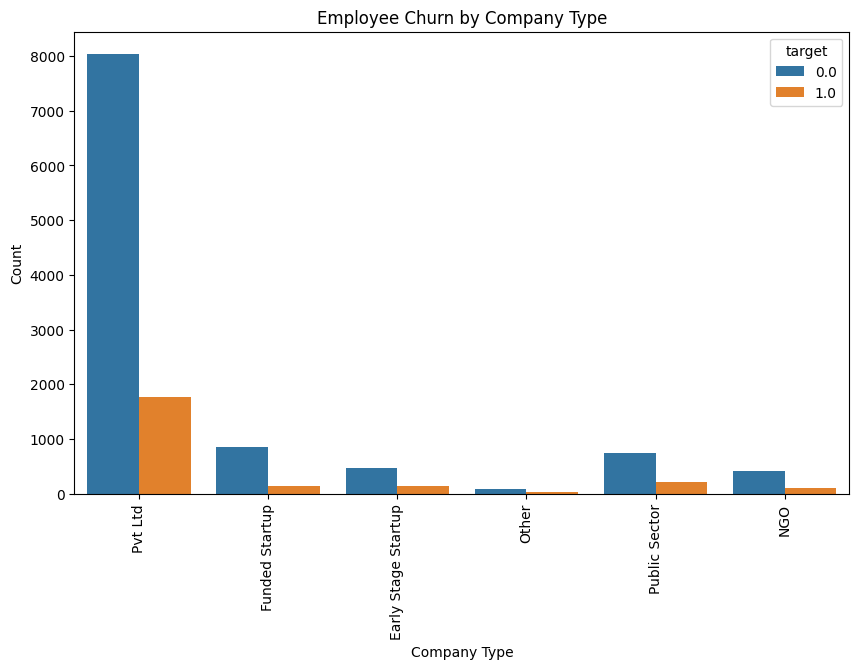

In [66]:
plt.figure(figsize=(10,6))
sns.countplot(x='company_type', hue='target', data=df)
plt.title('Employee Churn by Company Type')
plt.xlabel('Company Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

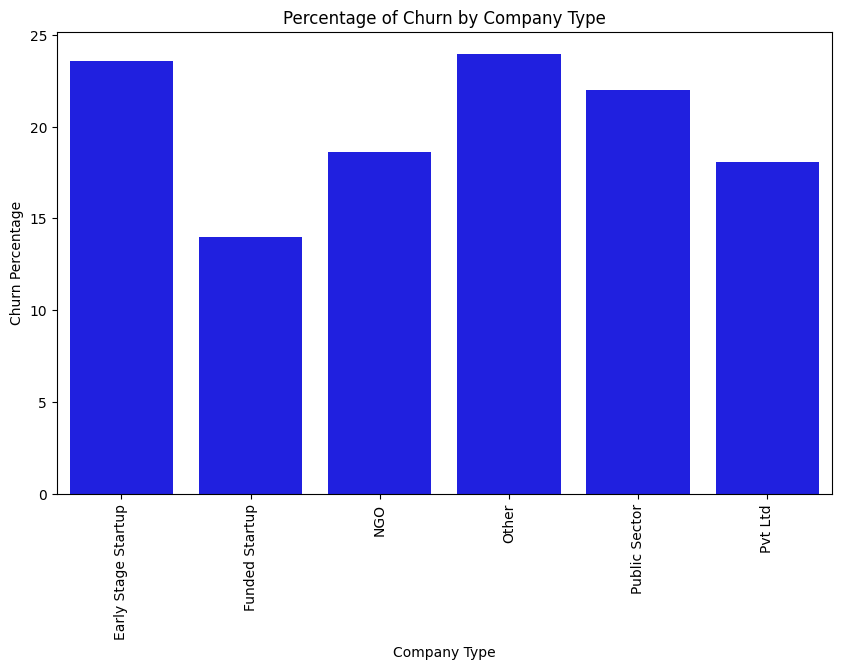

In [67]:
# churn by company type
churn_percentage = df.groupby('company_type')['target'].mean() * 100

plt.figure(figsize=(10,6))
sns.barplot(x=churn_percentage.index, y=churn_percentage.values, color='b')
plt.xlabel('Company Type')
plt.ylabel('Churn Percentage')
plt.title('Percentage of Churn by Company Type')
plt.xticks(rotation=90)
plt.show()

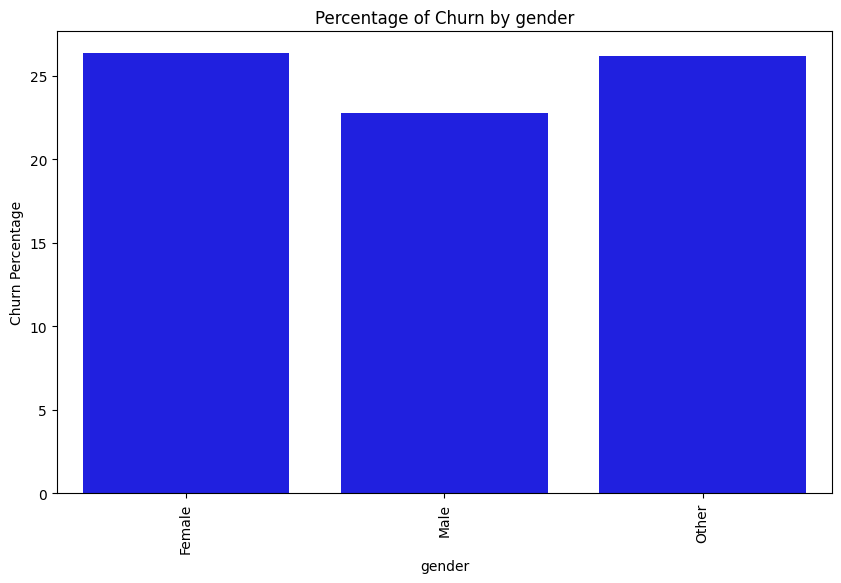

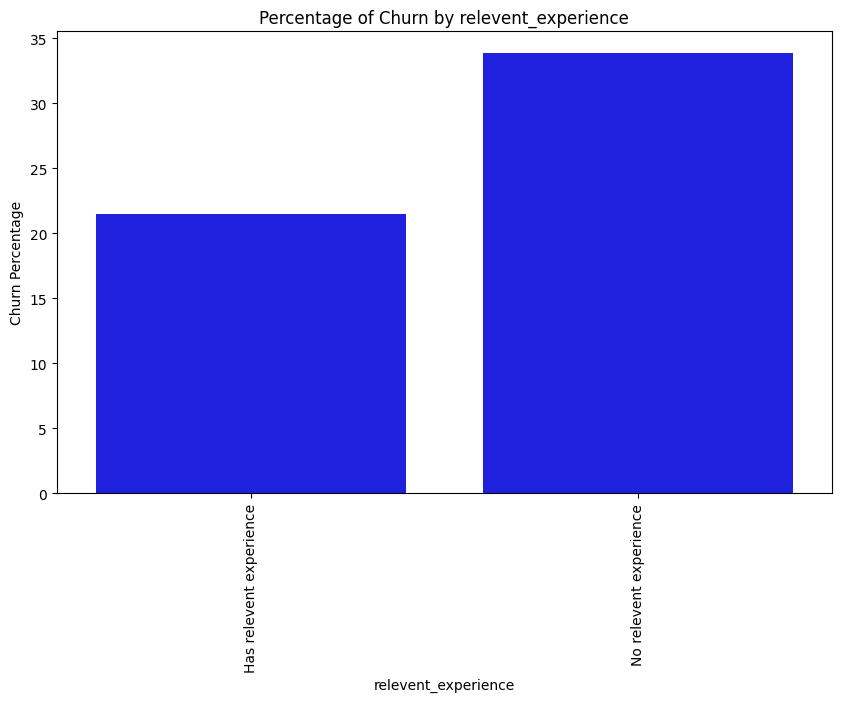

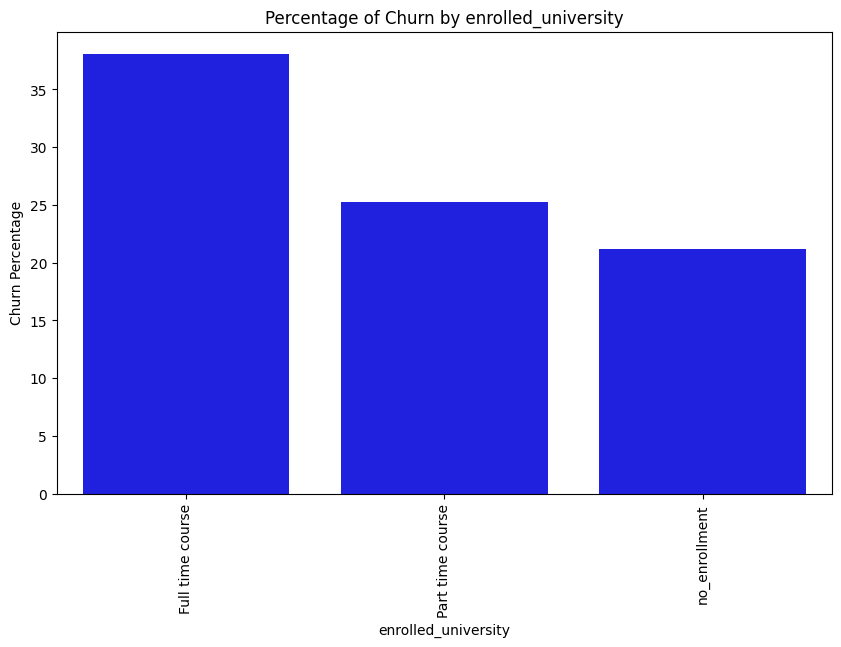

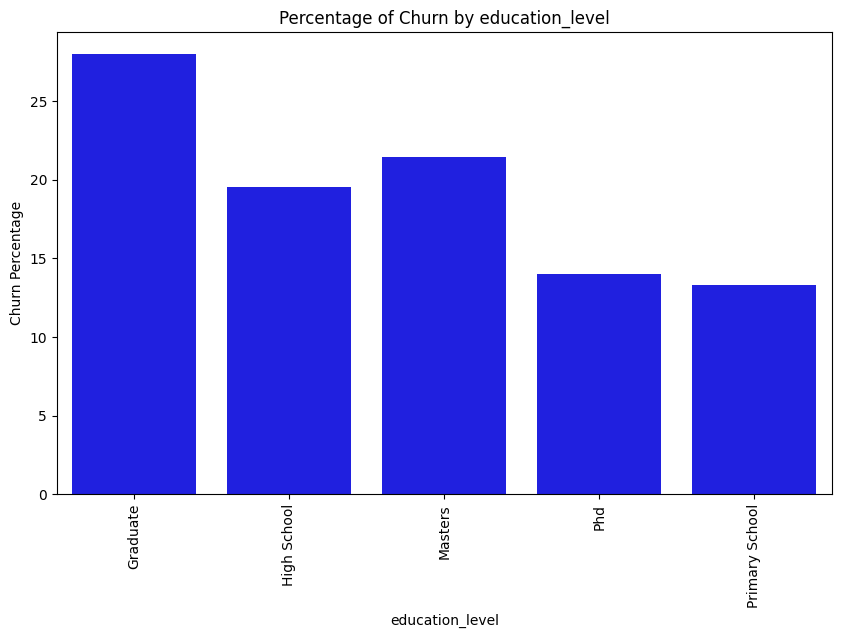

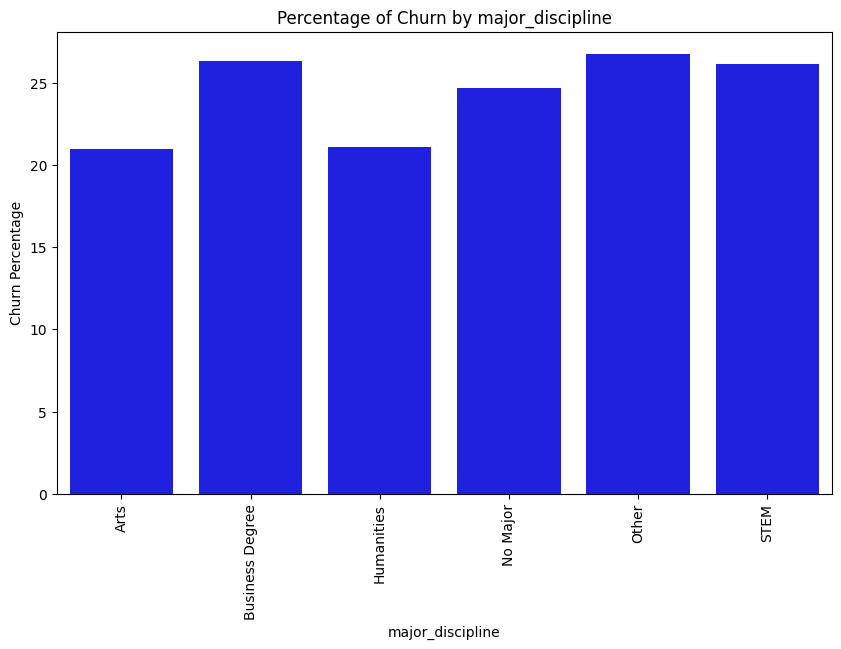

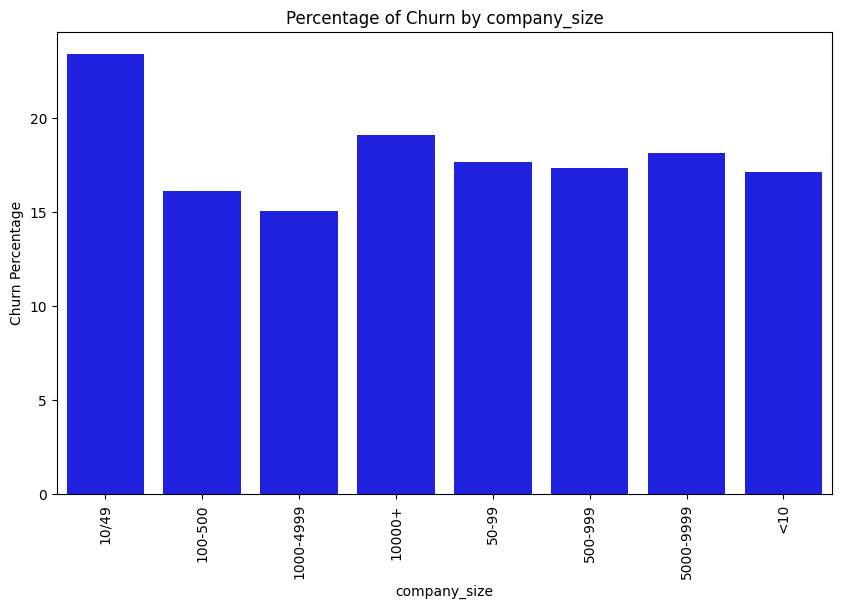

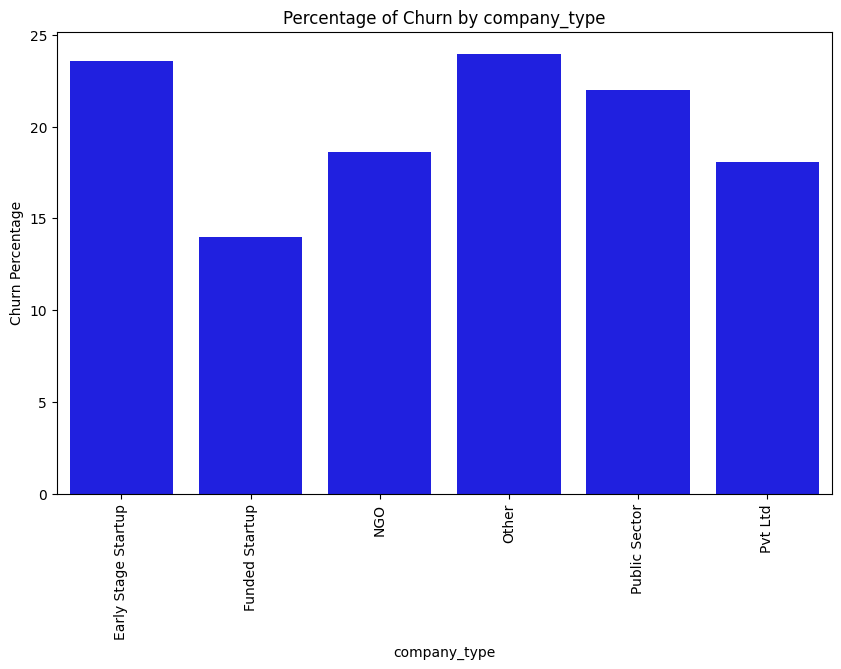

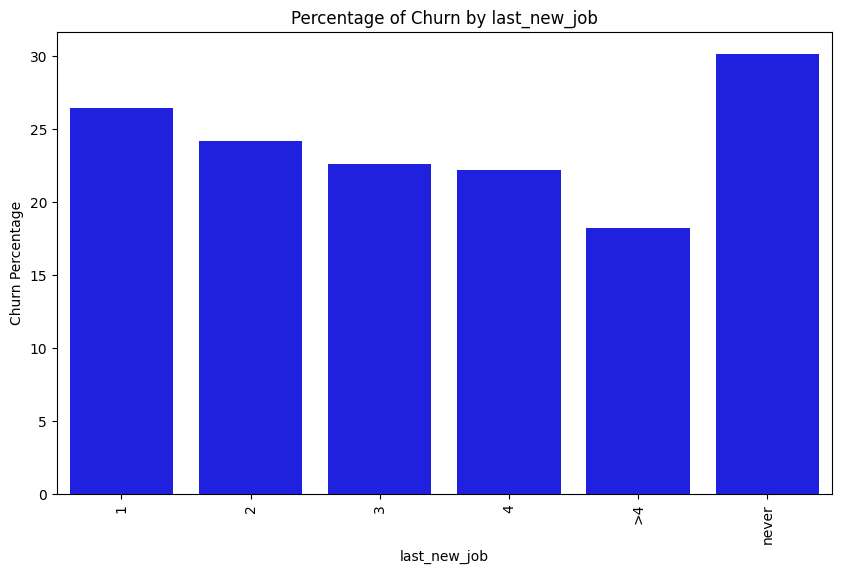

In [68]:
def plot_churn_rate(column):
    churn_rate = df.groupby(column)['target'].mean() * 100
    plt.figure(figsize=(10,6))
    sns.barplot(x=churn_rate.index, y=churn_rate.values, color='b')
    plt.xlabel(column)
    plt.ylabel('Churn Percentage')
    plt.title(f'Percentage of Churn by {column}')
    plt.xticks(rotation=90)
    plt.show()

required_columns = ['gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'company_size', 'company_type', 'last_new_job']

# churn rate for each column
for column in required_columns:
    plot_churn_rate(column)

In [69]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [70]:
df = df.drop('city', axis=1)

In [71]:
df.head()

,enrollee_id,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [72]:
# Now For converting the categorical data into numerical data

# Label encoder i.e. good -> averge -> bad patter is followed y following columns
# relevent_experience, enrolled_university, education_level, experience, last_new_job

# one hot encoding is followed by following columns
# gender, major_discipline comany_size, company_type

In [73]:
df.shape

(19158, 13)

In [74]:
from sklearn.preprocessing import LabelEncoder
from pandas import get_dummies

le = LabelEncoder()

label_encoding_columns = ['relevent_experience', 'enrolled_university', 'education_level', 'experience', 'last_new_job']
one_hot_encoding_columns = ['gender', 'major_discipline', 'company_size', 'company_type']

# Applying Label Encodeing
for column in label_encoding_columns:
    df[column] = le.fit_transform(df[column].astype(str))

# Applying One-Hot Encoding
df = pd.get_dummies(df, columns=one_hot_encoding_columns)

In [75]:
df.head()

,enrollee_id,city_development_index,relevent_experience,enrolled_university,education_level,experience,last_new_job,training_hours,target,gender_Female,...,company_size_50-99,company_size_500-999,company_size_5000-9999,company_size_<10,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,8949,0.920,0,3,0,21,0,36,1.0,False,...,False,False,False,False,False,False,False,False,False,False
1,29725,0.776,1,3,0,6,4,47,0.0,False,...,True,False,False,False,False,False,False,False,False,True
2,11561,0.624,1,0,0,15,6,83,0.0,False,...,False,False,False,False,False,False,False,False,False,False
3,33241,0.789,1,2,0,20,6,52,1.0,False,...,False,False,False,False,False,False,False,False,False,True
4,666,0.767,0,3,2,21,3,8,0.0,False,...,True,False,False,False,False,True,False,False,False,False


In [76]:
df.shape

(19158, 32)

In [77]:
df.isnull().sum()

enrollee_id                         0
city_development_index              0
relevent_experience                 0
enrolled_university                 0
education_level                     0
experience                          0
last_new_job                        0
training_hours                      0
target                              0
gender_Female                       0
gender_Male                         0
gender_Other                        0
major_discipline_Arts               0
major_discipline_Business Degree    0
major_discipline_Humanities         0
major_discipline_No Major           0
major_discipline_Other              0
major_discipline_STEM               0
company_size_10/49                  0
company_size_100-500                0
company_size_1000-4999              0
company_size_10000+                 0
company_size_50-99                  0
company_size_500-999                0
company_size_5000-9999              0
company_size_<10                    0
company_type

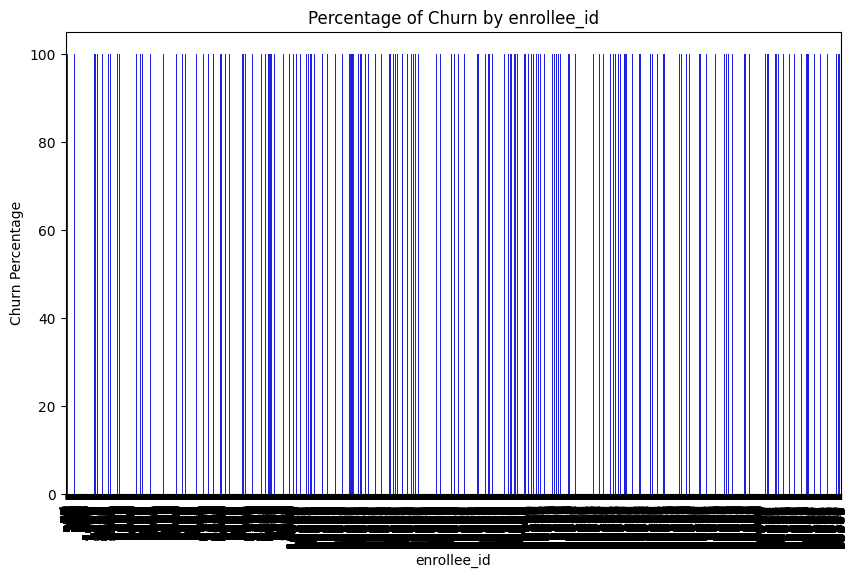

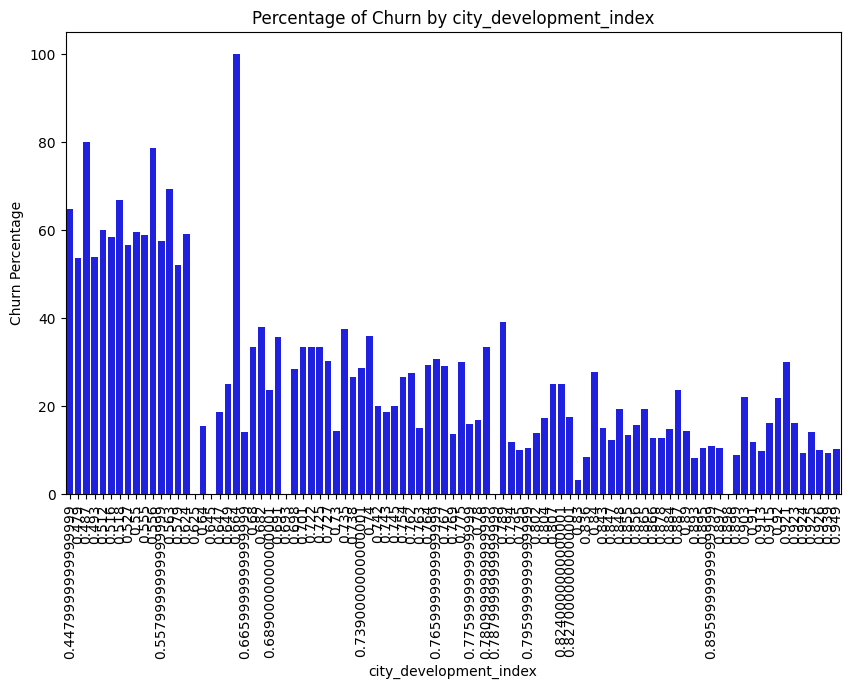

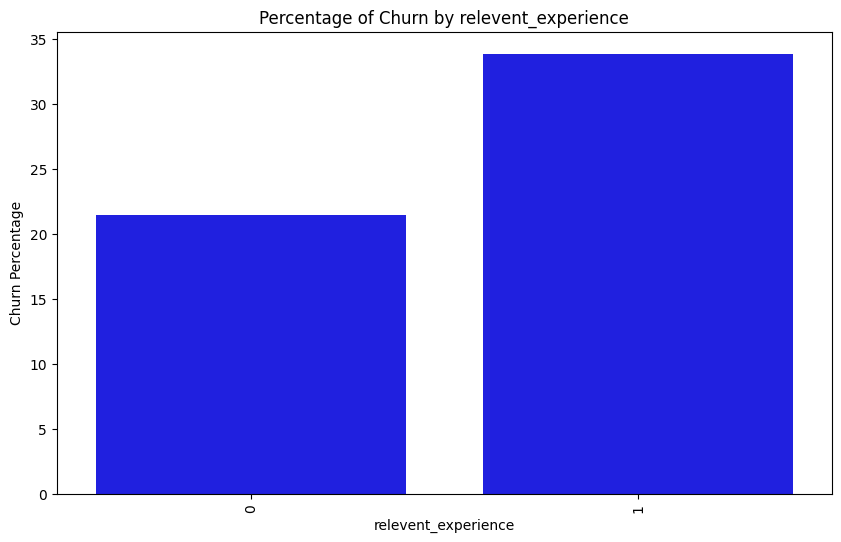

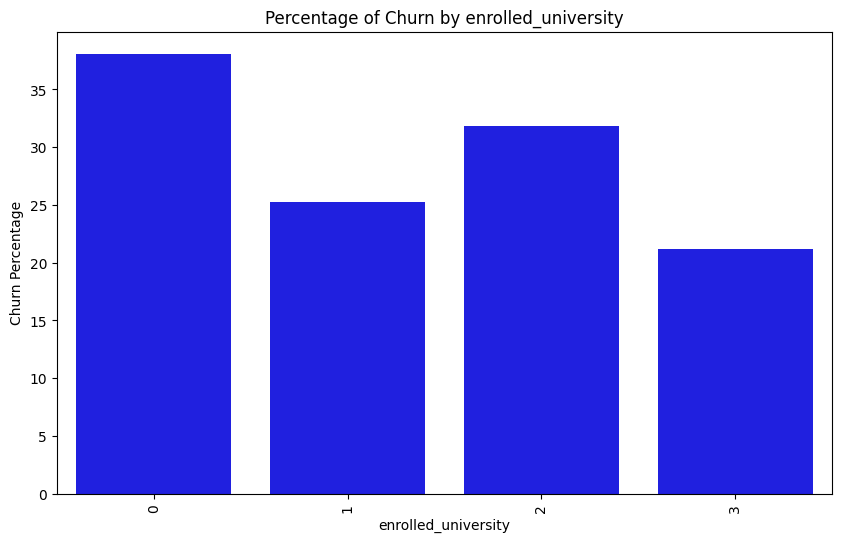

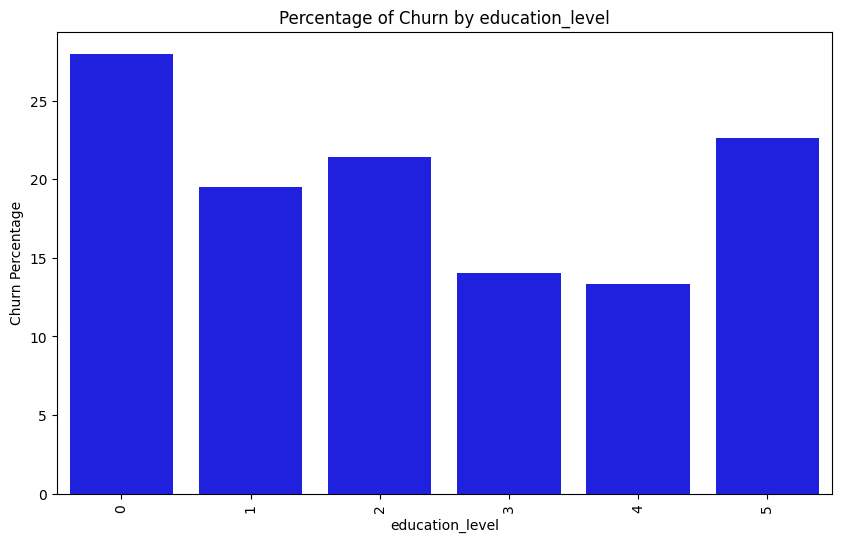

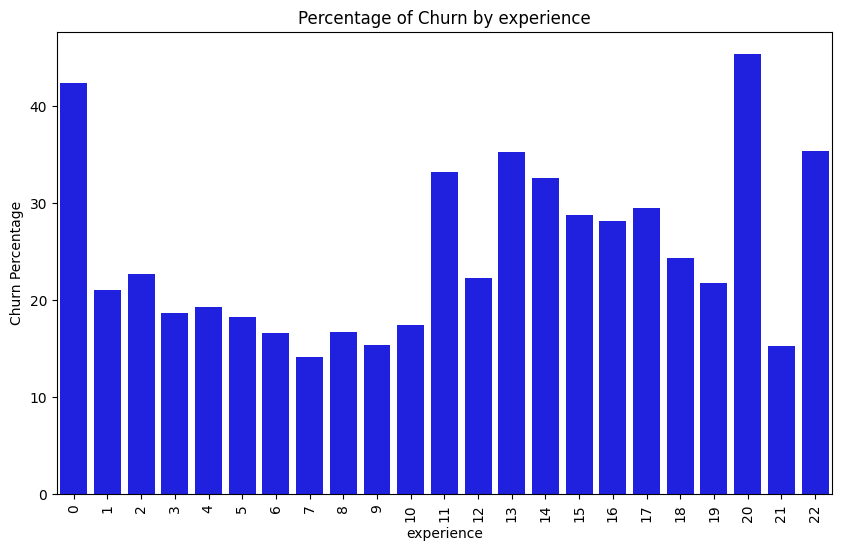

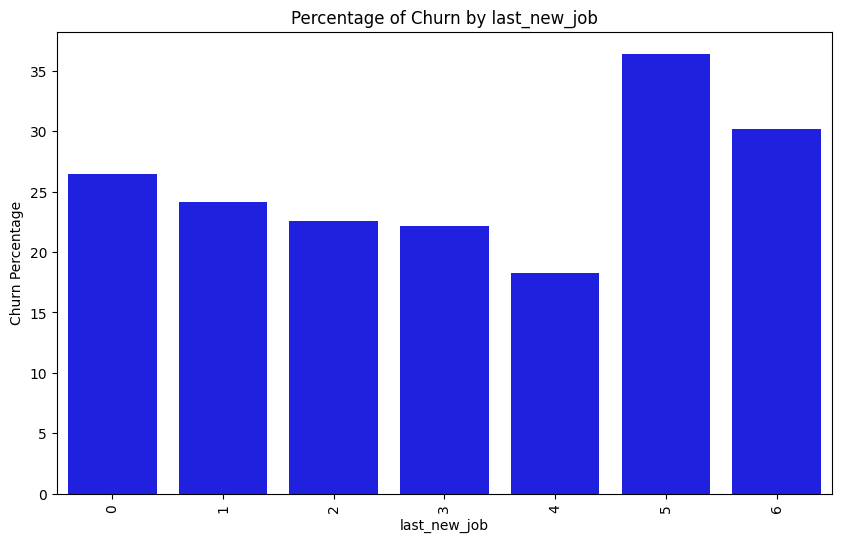

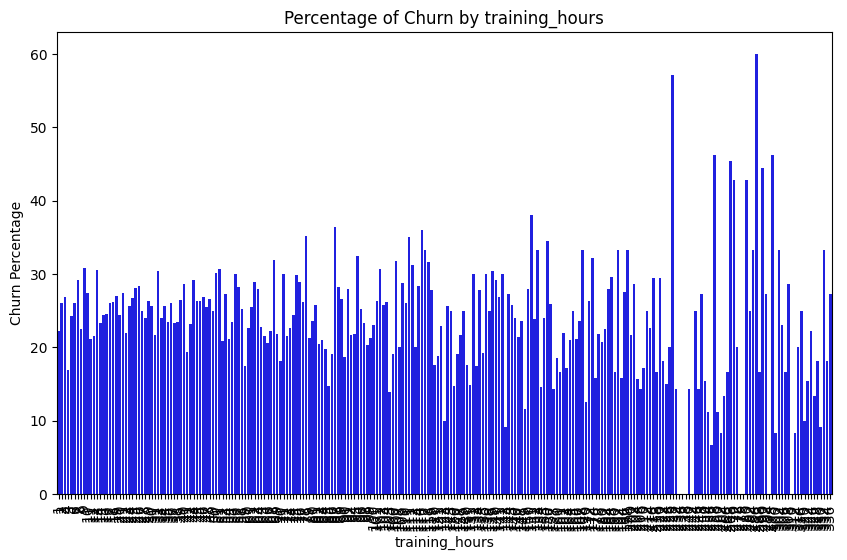

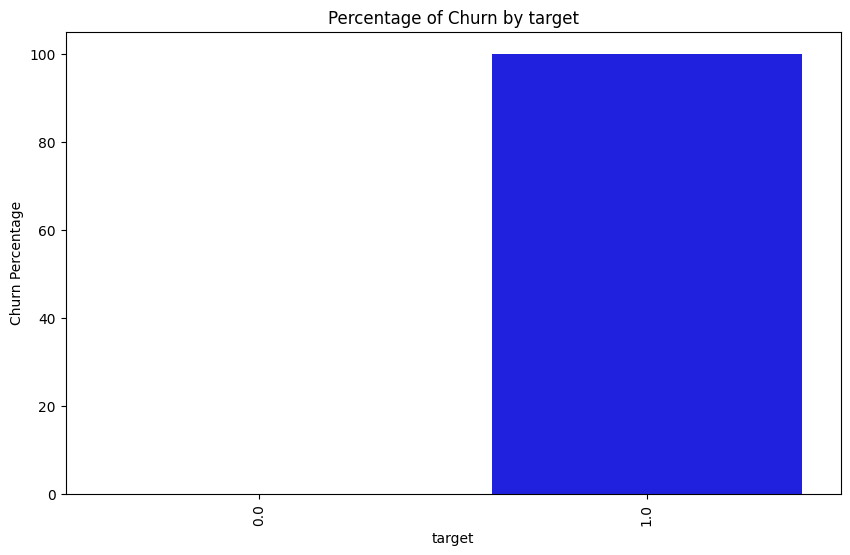

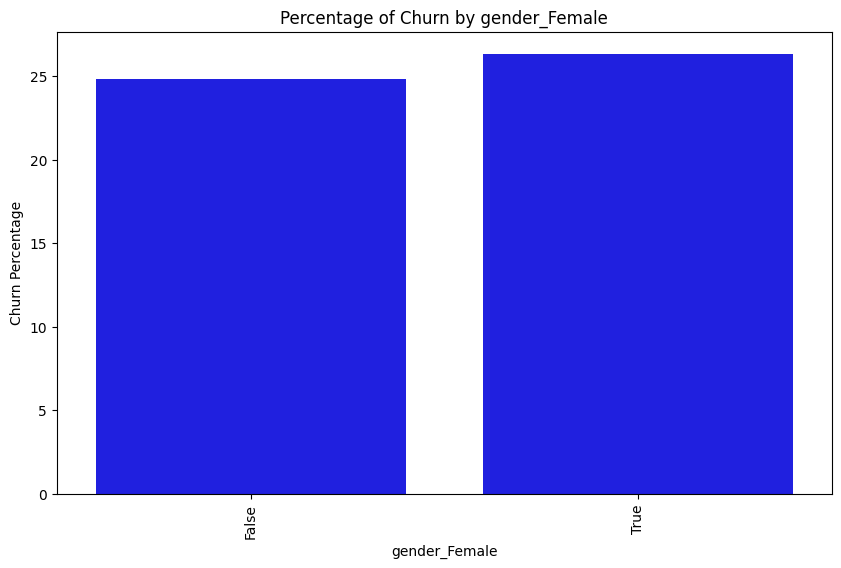

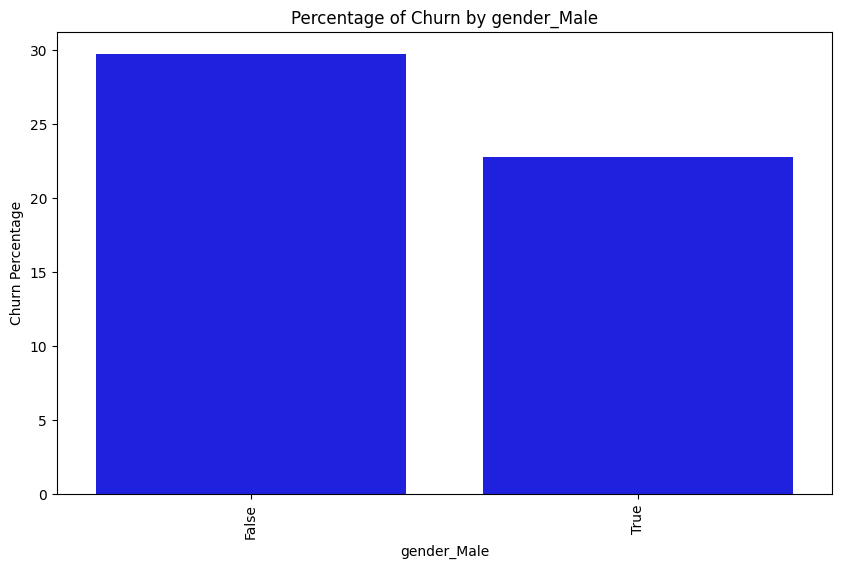

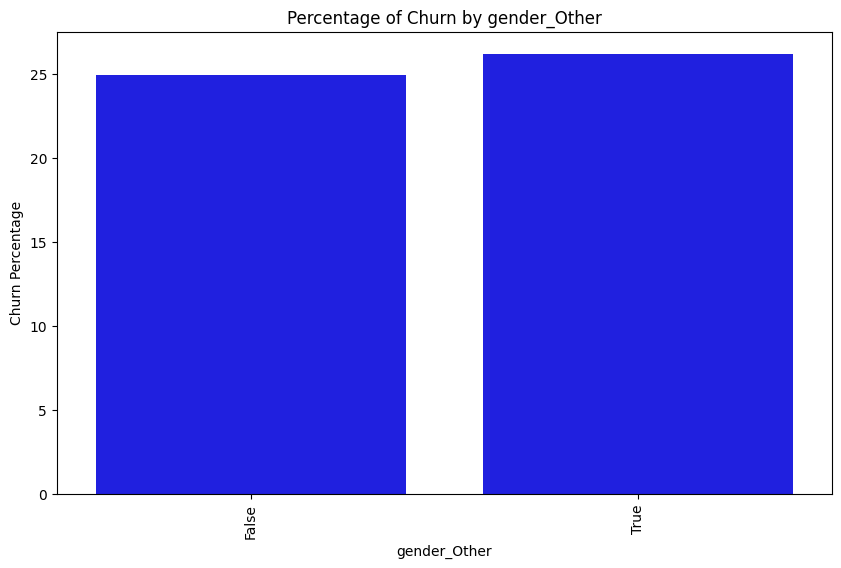

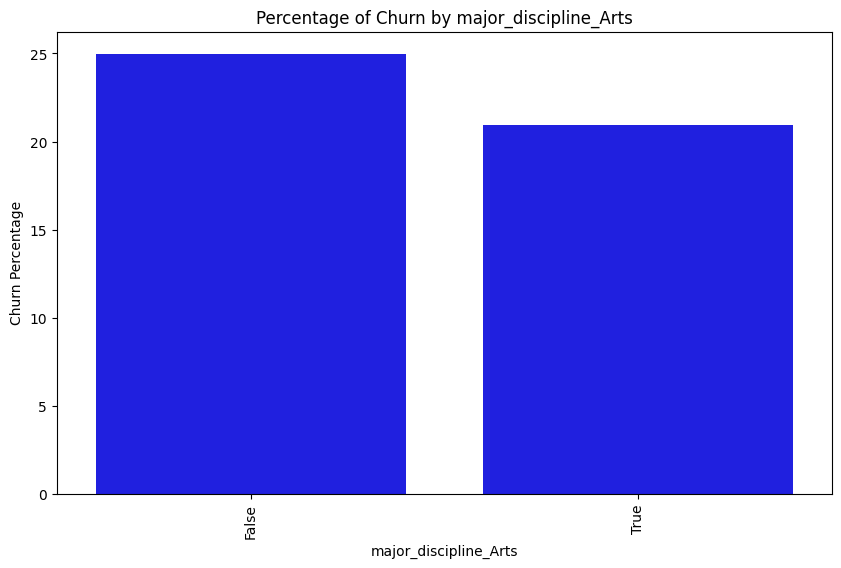

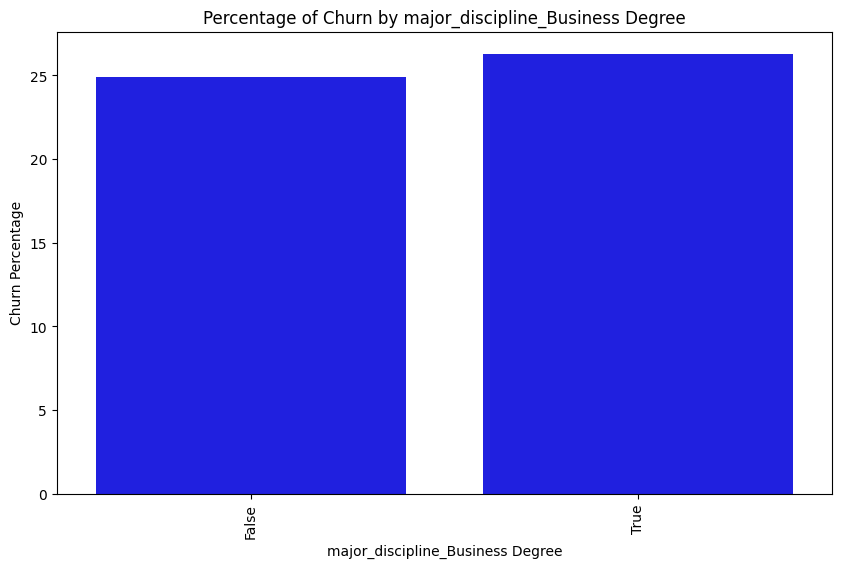

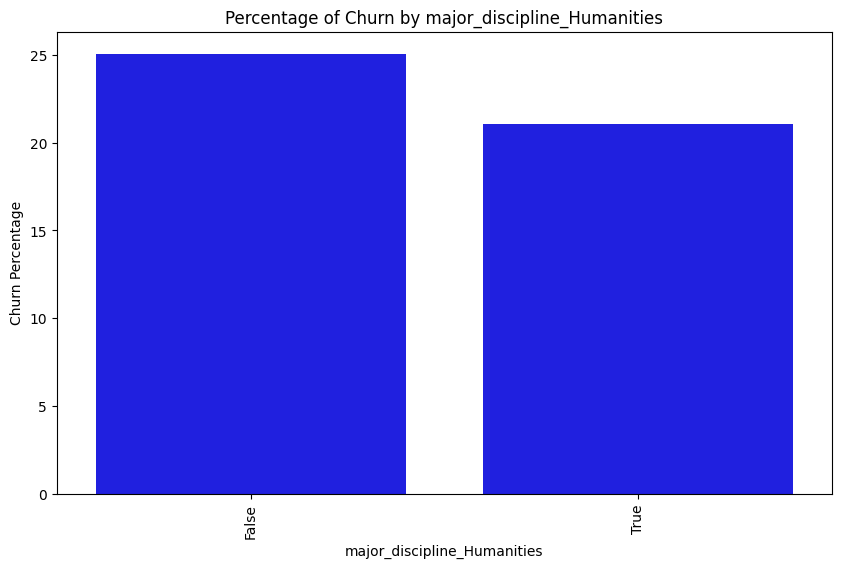

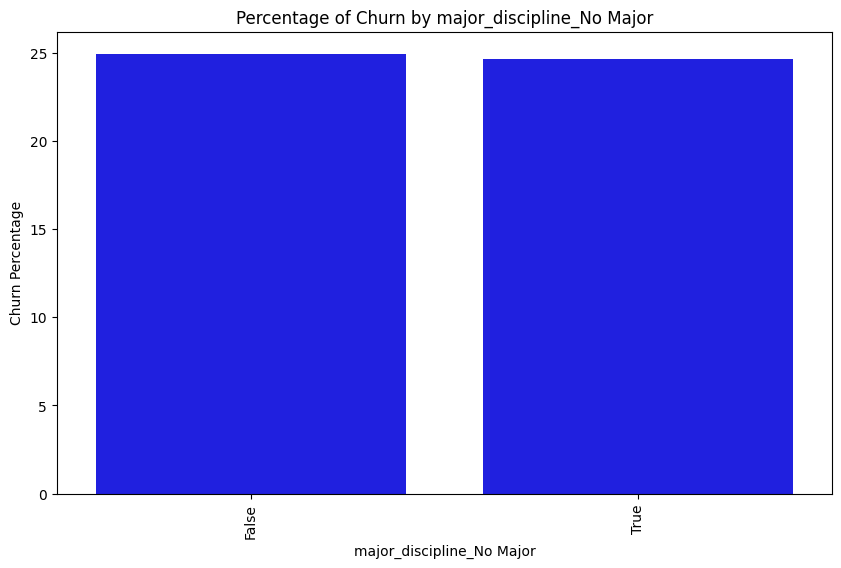

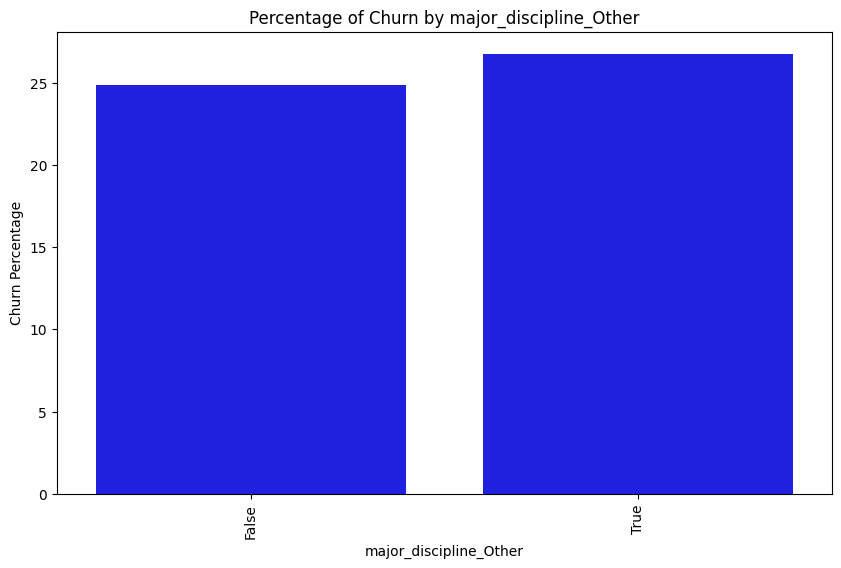

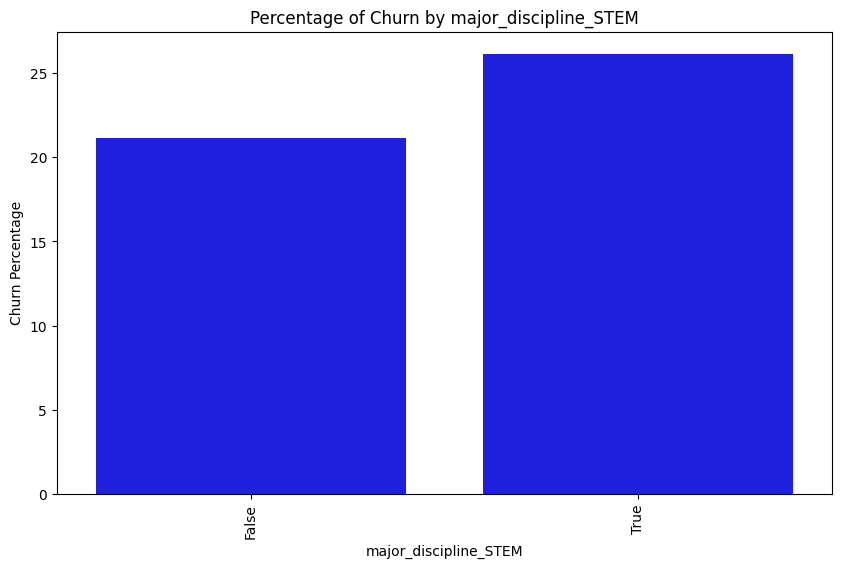

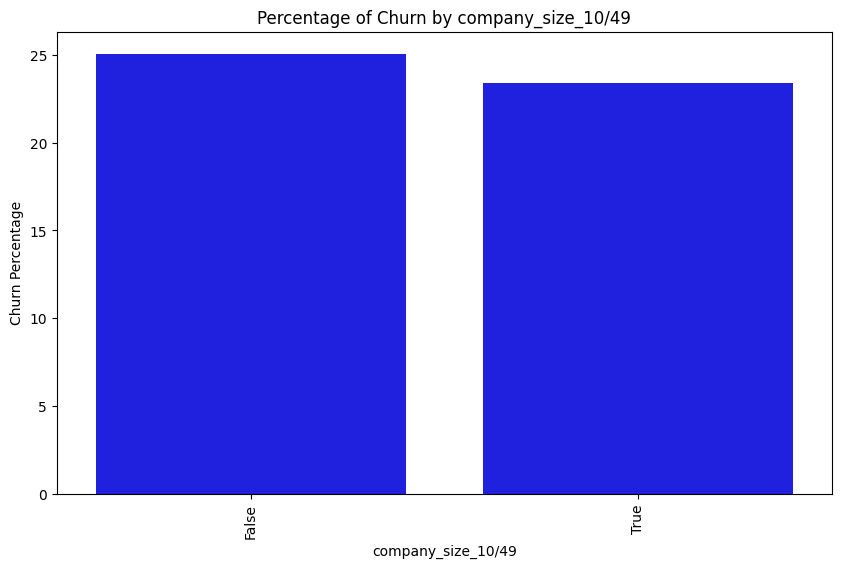

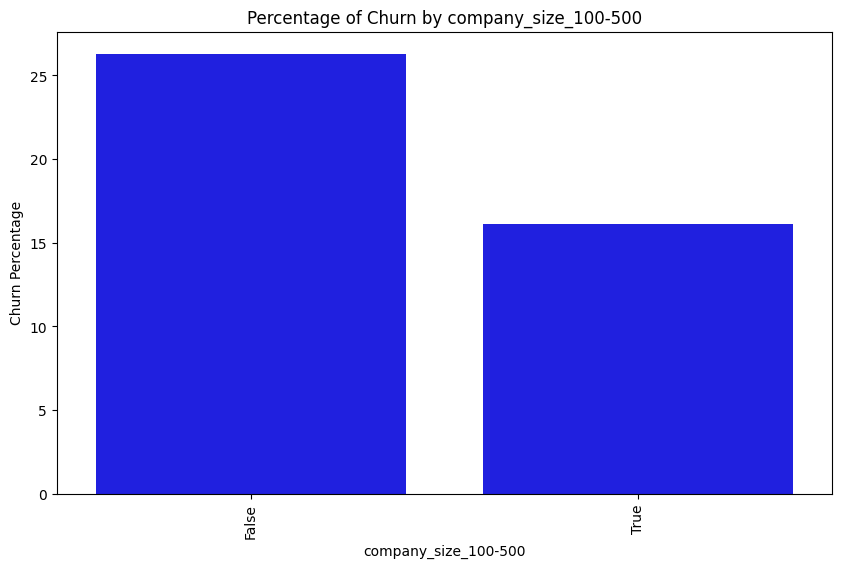

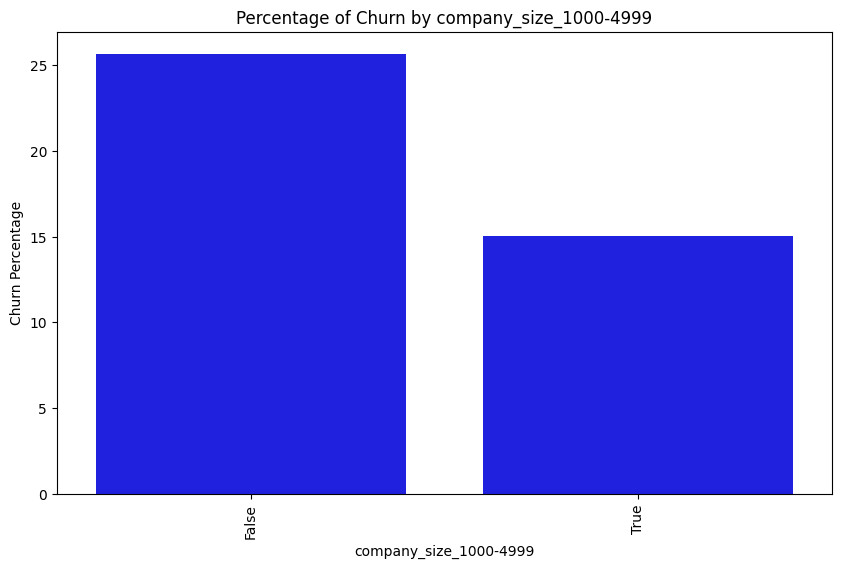

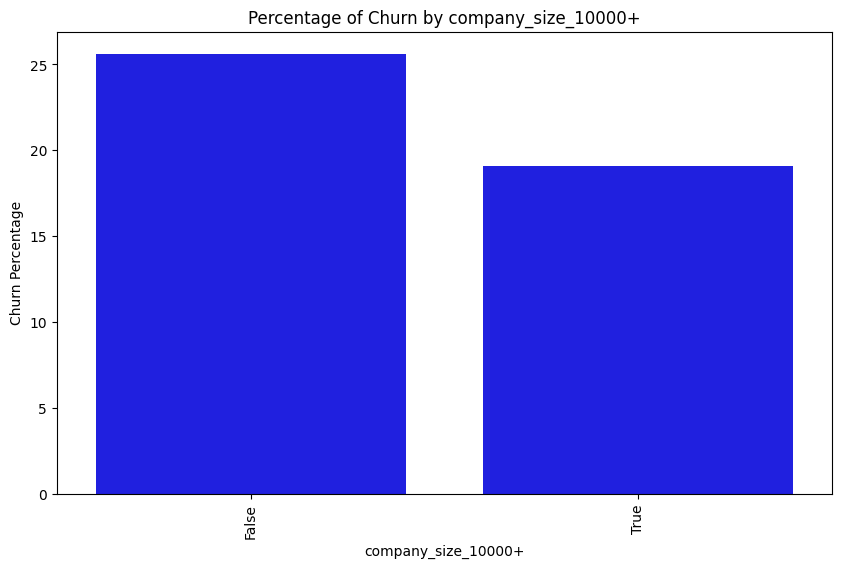

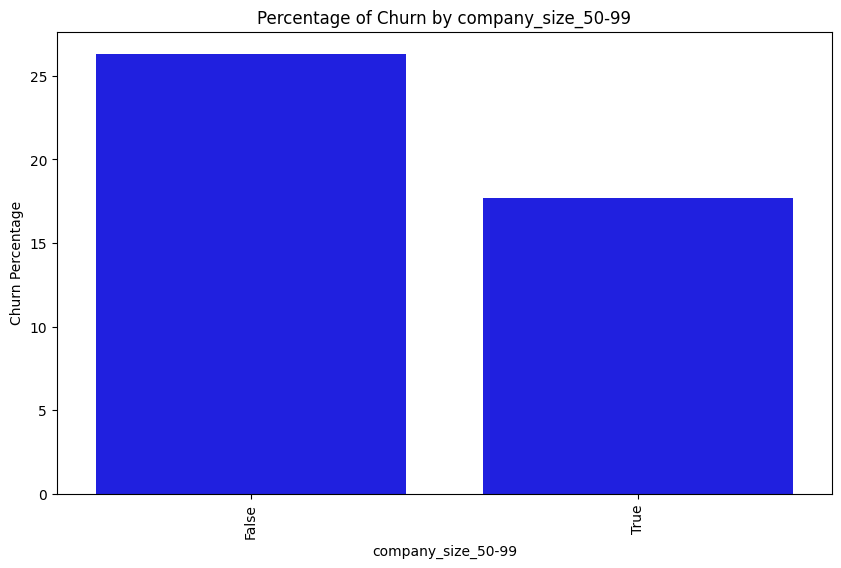

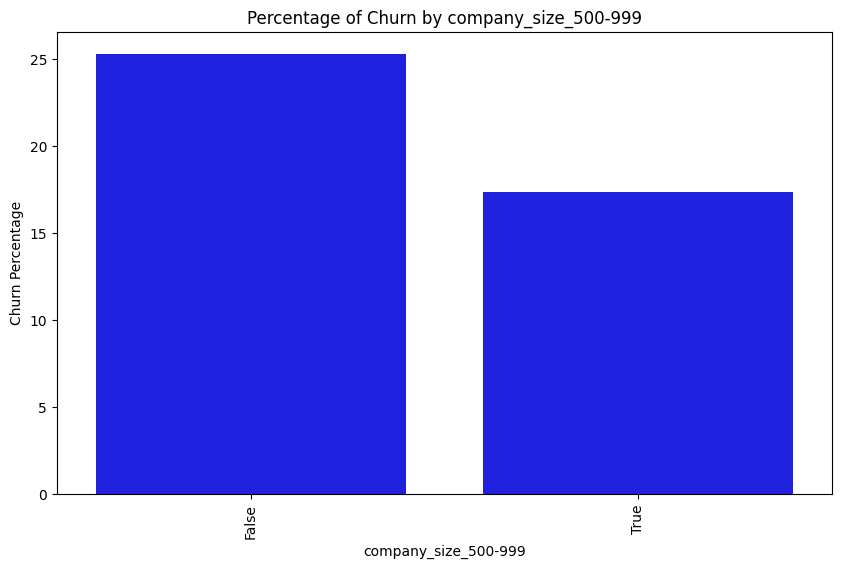

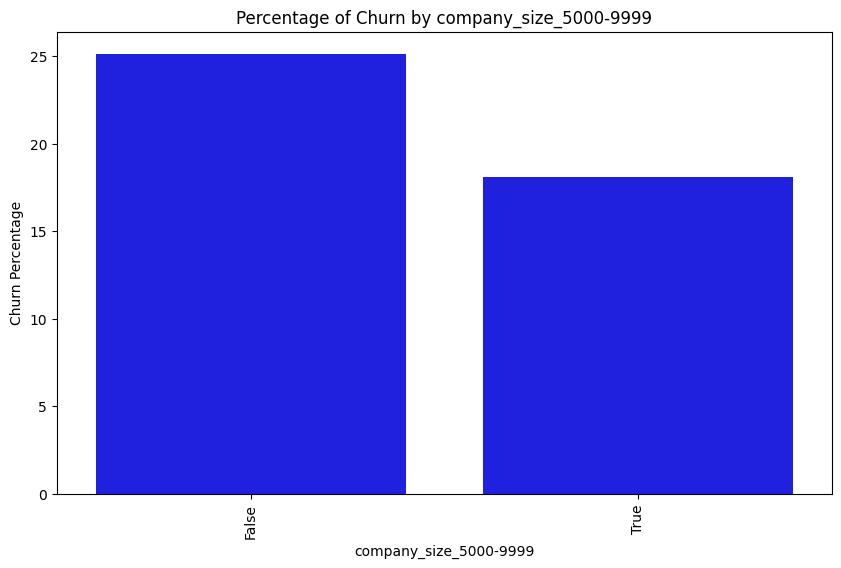

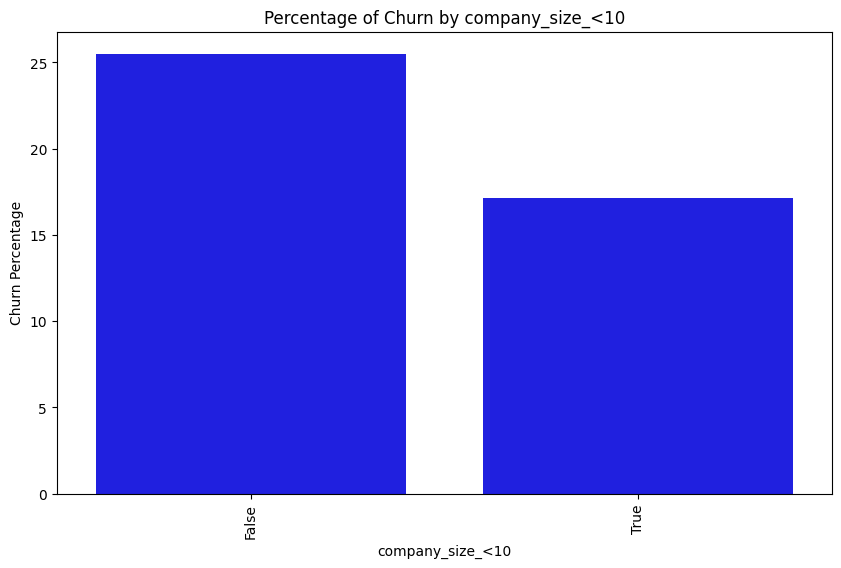

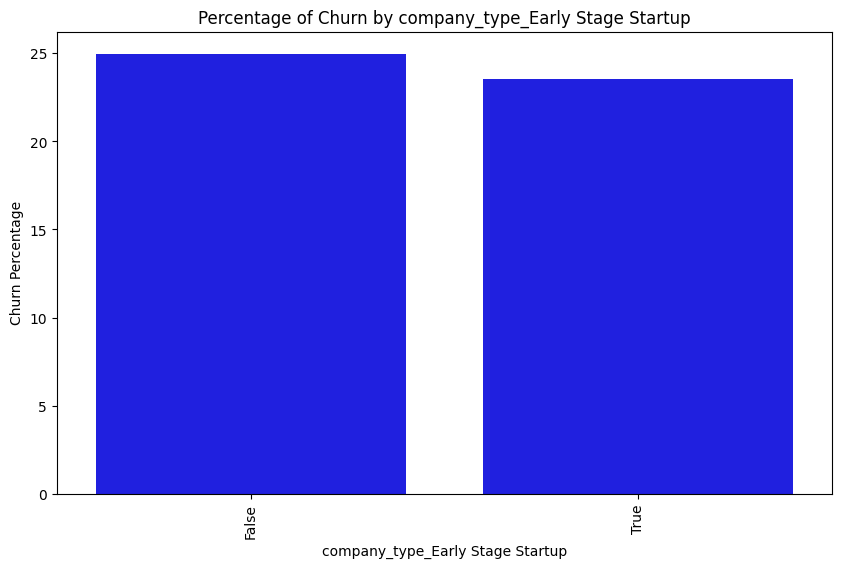

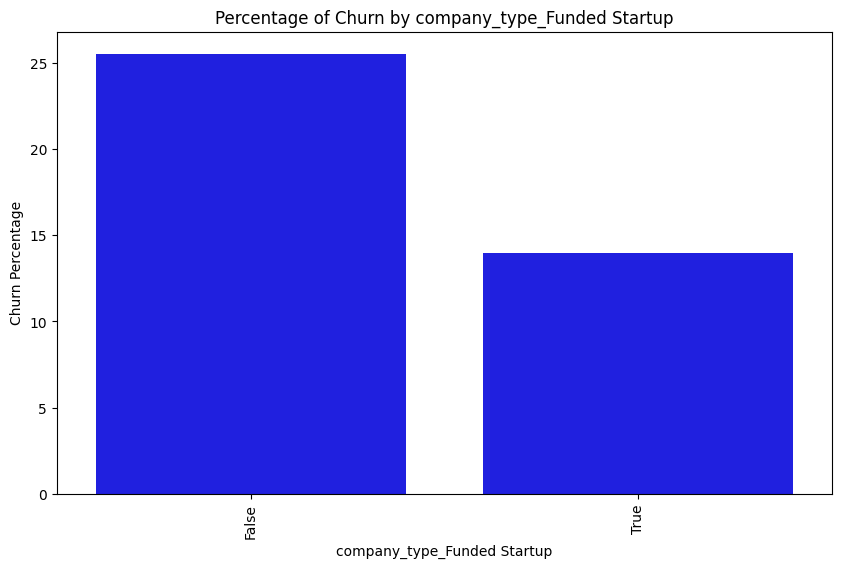

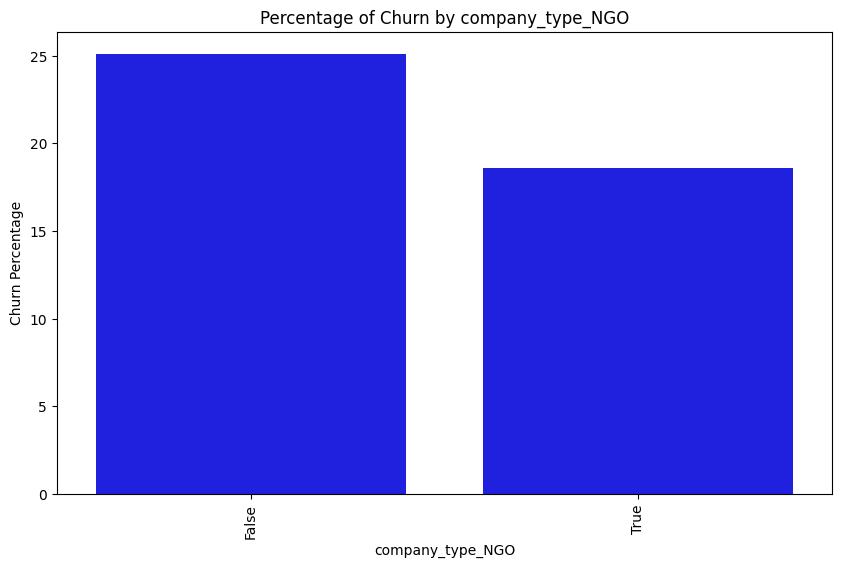

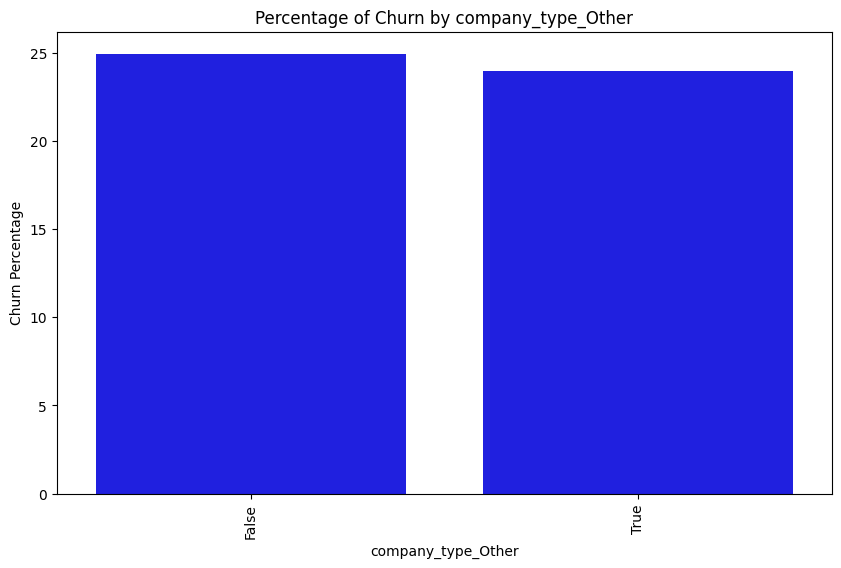

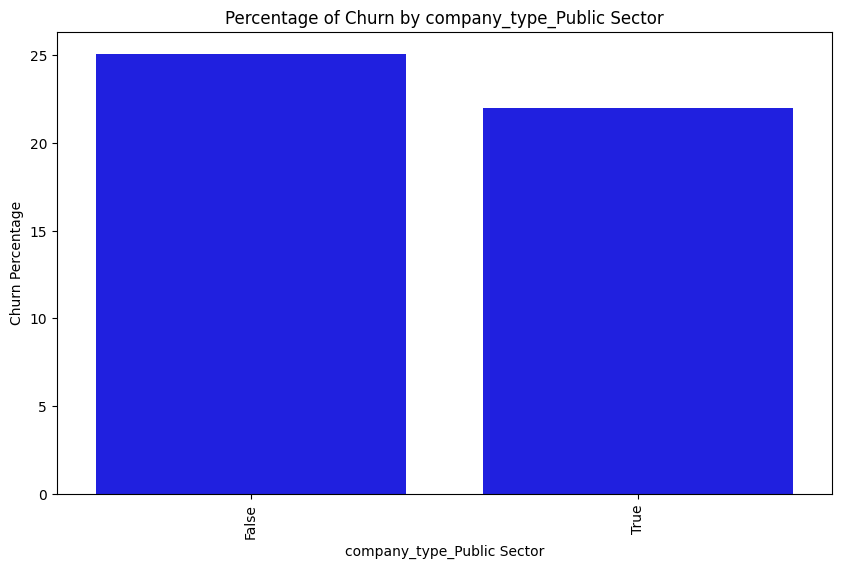

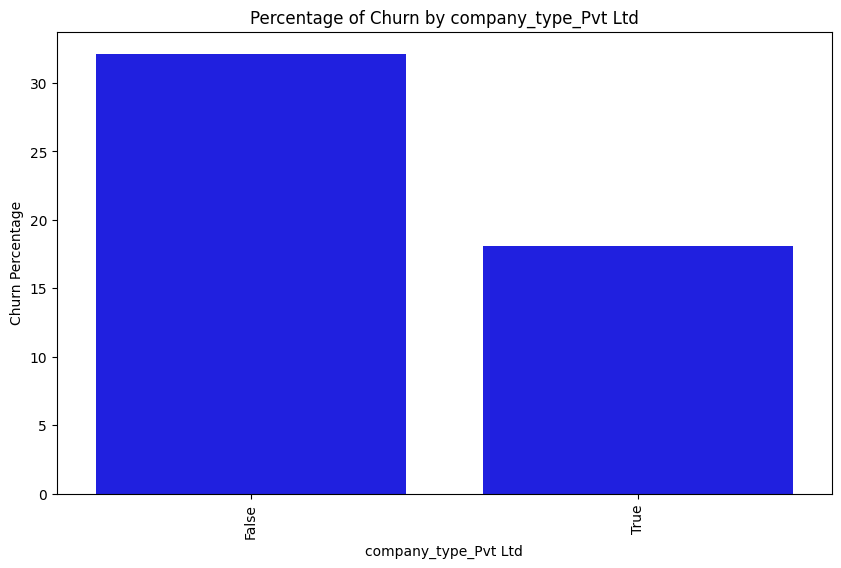

In [79]:
for column in df.columns:
    plot_churn_rate(column)

No more missing values as well !!!

SO now the results of Challenge 1 are

1. last_new_job: Employees with more experience in their current job are less likely to churn, indicating greater stability as tenure increases.

2. company_type: Early-stage startups tend to have higher churn rates compared to funded startups, suggesting more volatility in the early phases.

3. company_size: No clear inference can be drawn about the impact of company size on churn rates from the available data.

4. major_discipline: Students with majors in Arts and Humanities appear to be more stable employees with lower churn rates compared to those in STEM (Science, Technology, Engineering, Mathematics) and Business Administration fields.

5. education_level: Employees with graduate-level education tend to be more volatile and have higher churn rates.

6. relevant_experience: Contrary to expectations, if an employee has relevant experience in the field, they are more likely to churn.

7. enrolled_university: Employees who take longer/full-time courses at a university are more prone to churn compared to those taking part-time courses or not enrolled.

8. experience: Employees with very little experience or very high levels of experience are more likely to churn.

9. city_development_index: Cities with lower-middle that is betwen 0.4 and 0.6 development indices tend to have higher employee churn rates.


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Split the data
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Predict churn probabilities
probabilities = model.predict_proba(X_test)

              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86      2880
         1.0       0.25      0.00      0.00       952

    accuracy                           0.75      3832
   macro avg       0.50      0.50      0.43      3832
weighted avg       0.63      0.75      0.65      3832



d:\ml\New folder\assignment_ai_intern\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [81]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
print(classification_report(y_test, rf_y_pred))

# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)
print(classification_report(y_test, gb_y_pred))

# Support Vector Machine
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)
print(classification_report(y_test, svm_y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.89      0.86      2880
         1.0       0.56      0.43      0.49       952

    accuracy                           0.77      3832
   macro avg       0.69      0.66      0.67      3832
weighted avg       0.76      0.77      0.76      3832

              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      2880
         1.0       0.58      0.45      0.51       952

    accuracy                           0.78      3832
   macro avg       0.70      0.67      0.68      3832
weighted avg       0.77      0.78      0.77      3832

              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86      2880
         1.0       0.00      0.00      0.00       952

    accuracy                           0.75      3832
   macro avg       0.38      0.50      0.43      3832
weighted avg       0.56      0.75      0.64      3832



d:\ml\New folder\assignment_ai_intern\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\ml\New folder\assignment_ai_intern\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\ml\New folder\assignment_ai_intern\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


So as we can see Gradient Boosting works the best with overall 78% accuracy so we will proceed with that
